In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

In [2]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

,x1,x2
0,0.412293,0.661044
1,0.405083,0.827053
2,0.076189,0.543618
3,0.664566,0.162495
4,0.434666,0.489482


In [3]:
def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)

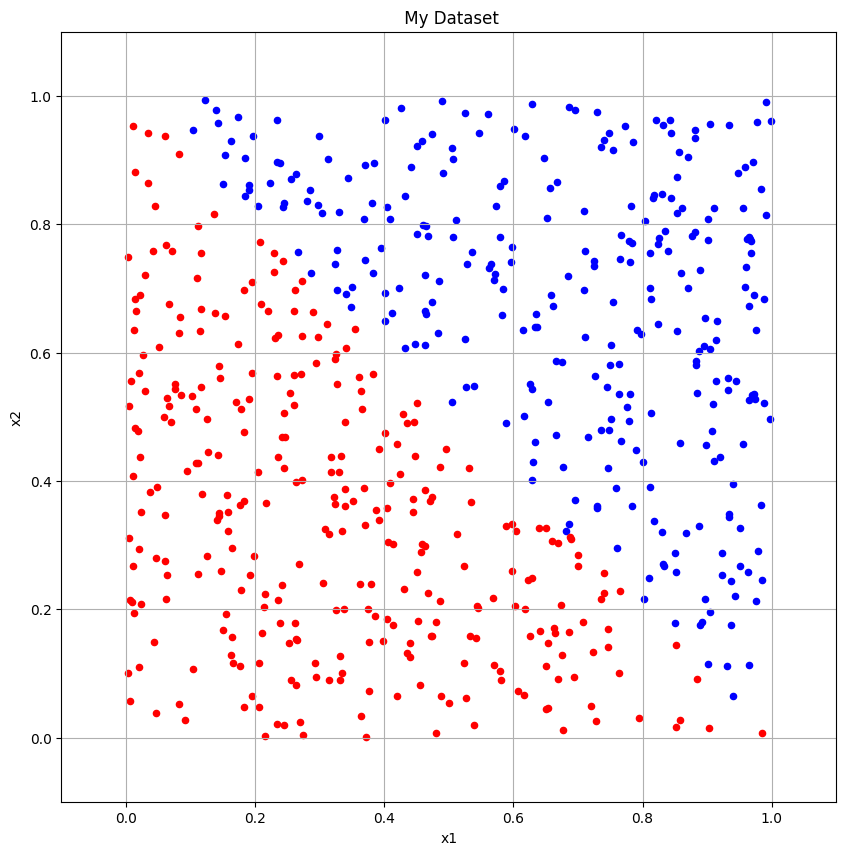

In [4]:
fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())

In [5]:
InitialWeights = [0.1, 0.1]
InitialBias = 0.01
LearningRate = 0.1
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

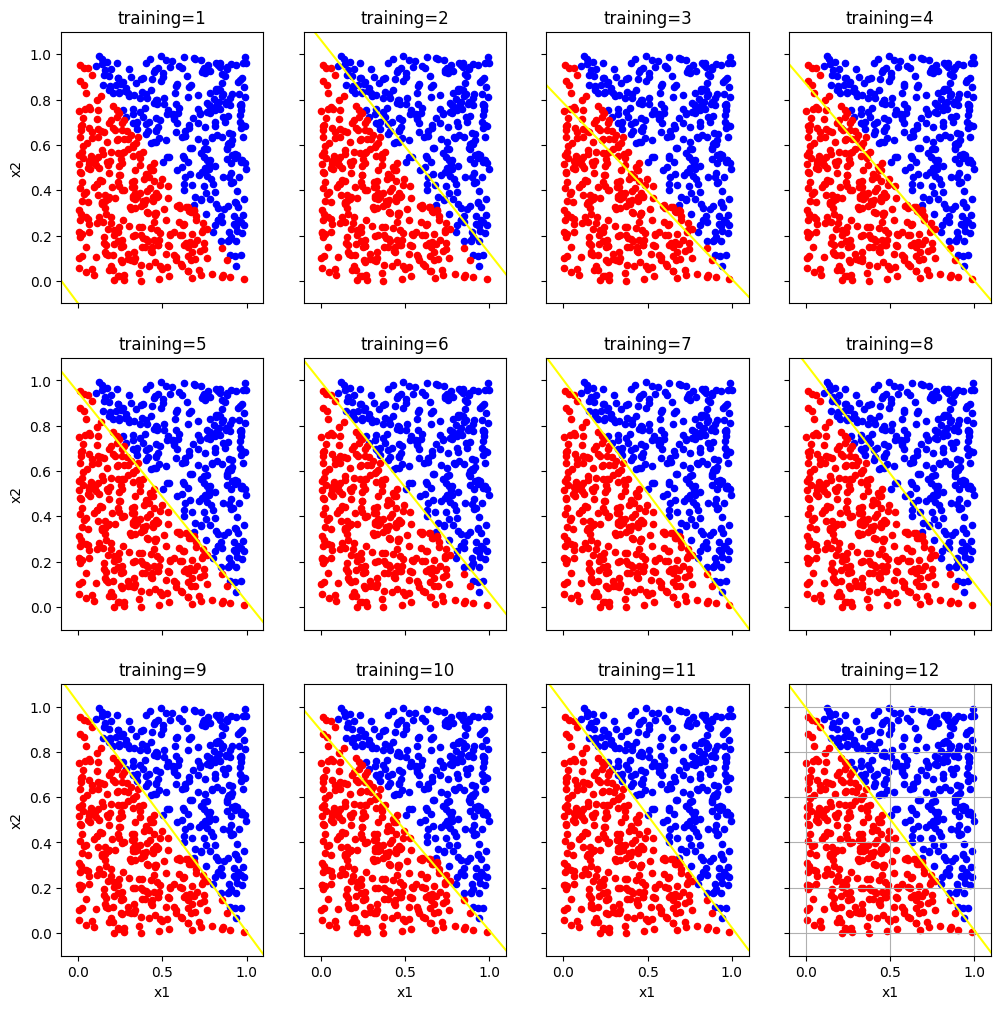

In [6]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)